In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = np.array([
    [-1, -1],
    [-2, -1],
    [-1, -2],
    [0, 0],
    [2, 1],
    [2, 3]
])

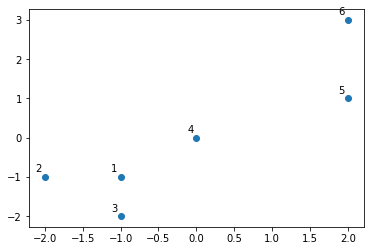

In [3]:
plt.scatter(data[:,0], data[:,1])

for label, x, y in zip(range(1, 7), data[:, 0], data[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage

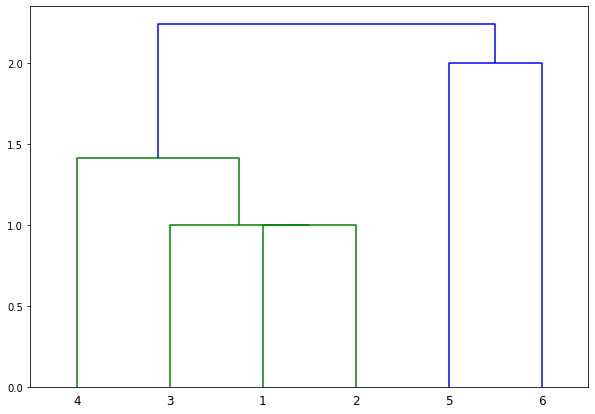

In [5]:
linked = linkage(data, 'single')

labelList = range(1, 7)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [6]:
from sklearn.cluster import KMeans

In [7]:
km = KMeans(n_clusters=2, random_state=42)
km.fit(data)
km.labels_

array([0, 0, 0, 0, 1, 1], dtype=int32)

In [8]:
from sklearn.cluster import DBSCAN

In [9]:
df_dbscan = DBSCAN(eps=2, min_samples=2)
df_dbscan.fit(data)
df_dbscan.labels_

array([0, 0, 0, 0, 1, 1])

In [10]:
from sklearn.metrics import silhouette_score
silhouette_score(data, [0, 0, 0, 1, 1, 1], metric='euclidean')

0.45993283428643883

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data)

PCA(n_components=2)

In [12]:
print(pca.components_)
print(pca.explained_variance_)

[[ 0.67944959  0.73372219]
 [-0.73372219  0.67944959]]
[5.60768096 0.39231904]


In [18]:
pca.mean_

array([0., 0.])

In [13]:
B = pca.transform(data)
print(B)

[[-1.41317178  0.05427259]
 [-2.09262138  0.78799478]
 [-2.14689397 -0.625177  ]
 [ 0.          0.        ]
 [ 2.09262138 -0.78799478]
 [ 3.56006575  0.57090441]]


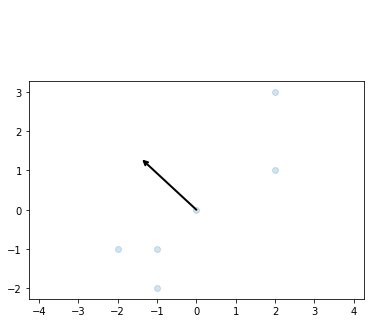

In [16]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(data[:, 0], data[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

[0. 0.] [4.82692051 5.21248185]


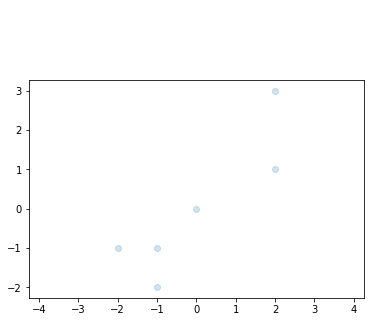

In [27]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(data[:, 0], data[:, 1], alpha=0.2)
length = pca.explained_variance_[0]
vector = pca.components_[0]
v = vector * 3 * np.sqrt(length)
print(pca.mean_, pca.mean_ + v)
draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');
plt.